In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
data = pd.read_csv('california_housing_train.csv')

In [4]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(data.drop('median_house_value',axis=1),data['median_house_value'],test_size=0.2)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [7]:
model.score(xtest,ytest)

0.6429753133376147

In [8]:
old_model_score = model.score(xtest,ytest)

In [9]:
pridiction = model.predict(xtest)

In [10]:
combine = np.column_stack((xtest,ytest,pridiction))

In [11]:
newdf = pd.DataFrame(combine,columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','pridiction'])

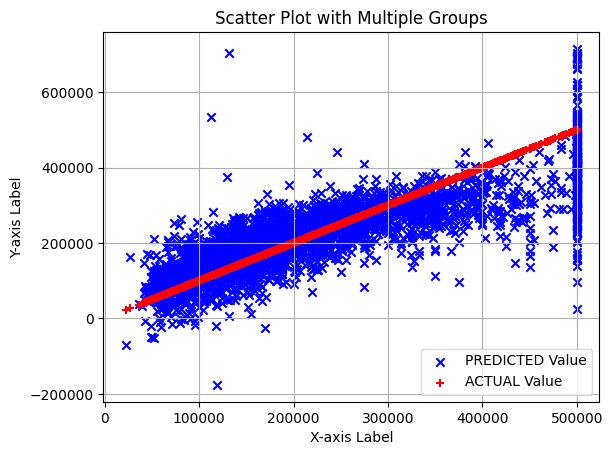

In [12]:
plt.scatter(newdf['median_house_value'], pridiction, color='blue', marker='x', label='PREDICTED Value')
plt.scatter(newdf['median_house_value'], ytest, color='red', marker='+', label='ACTUAL Value')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Multiple Groups')
plt.legend()
plt.grid(True)

plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

In [14]:
new_model = LinearRegression()
new_model.fit(xtrain_poly,ytrain)

LinearRegression()

In [15]:
new_model.score(xtest_poly,ytest)

0.7095697127092373

In [16]:
new_model_score = new_model.score(xtest_poly,ytest)

## After Applying Polynomial Features My Model Performance Improved By 6%.
- Why Polynomial Features Helped:
  - Capture Nonlinear Relationships
  - Improved Model Complexity
  - Higher Feature Representation

- Things to Consider:
  - Avoid Overfitting
  - Regularization
  - Feature Scaling

In [17]:
new_model_score - old_model_score

0.06659439937162259